INFO: execution time for solving mip (sec) = 0.25042200088500977
INFO: objective = 8.0
[(bend1, BendMachine3, 0, 1), (bend2, BendMachine1, 0, 2), (weld1, WeldMachine2, 1, 2), (paint1, PaintMachine, 2, 5), (weld2, WeldMachine2, 2, 5), (paint2, PaintMachine, 5, 8), (MakeSpan, BendMachine1, 8, 9)]


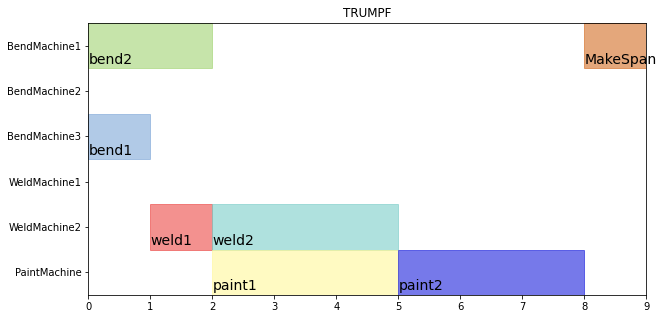

In [30]:
# pip install pyschedule==0.2.6

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=20)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, bend2, weld1, weld2, paint1, paint2 = S.Task('bend1',1), S.Task('bend2',2), S.Task('weld1',1), S.Task('weld2',3), S.Task('paint1',3), S.Task('paint2',3)

# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource

S += bend1< weld1, weld1 <paint1
S += bend2< weld2, weld2 <paint2



S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2
S += paint1% PaintMachine
S += paint2% PaintMachine




# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))